In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Data Import

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
df = pd.read_csv(url)

In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
col=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
       "population", "households", "median_income"]

In [5]:
len(df)

20640

In [6]:
df = df[df['ocean_proximity']== '<1H OCEAN']

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
del df['ocean_proximity']

In [9]:
back_up = df

<Axes: xlabel='median_house_value', ylabel='Count'>

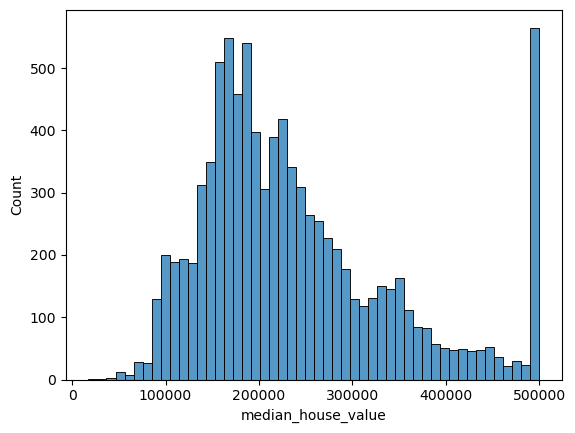

In [10]:
sns.histplot(df.median_house_value, bins=50)

## Question1

There's one feature with missing values. What is it?

* total_rooms
* total_bedrooms
* population
* households

In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        102
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Answer: 'total_bedrooms'

In [12]:
df['total_bedrooms'].mean()

546.5391852999778

In [13]:
df[df['total_bedrooms'].isnull() == True]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
123,-124.00,40.92,29.0,1429.0,NaN,672.0,266.0,2.9485,98800.0
134,-124.13,40.55,38.0,544.0,NaN,240.0,91.0,3.2500,94800.0
159,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,162100.0
265,-118.45,34.30,27.0,2676.0,NaN,2661.0,623.0,4.3047,152100.0
268,-118.55,34.28,16.0,8879.0,NaN,3468.0,1200.0,8.1125,428600.0
...,...,...,...,...,...,...,...,...,...
8893,-122.91,38.46,18.0,2021.0,NaN,912.0,329.0,4.5000,251900.0
8927,-118.80,34.41,45.0,1610.0,NaN,1148.0,347.0,2.7000,120400.0
9008,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0
9089,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0


## Question 2
What's the median (50% percentile) for variable 'population'?

* 995
* 1095
* 1195
* 1295

In [14]:
df.population.median()

1247.0

## Answer: ~1295

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
seed = 42
np.random.seed(seed)

df = df.sample(frac=1, random_state=seed)
df_train, df_test = train_test_split(df, test_size=0.4, random_state=seed)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=seed)

for dataset in [df_train, df_val, df_test]:
    dataset['median_house_value'] = np.log1p(dataset['median_house_value'])


## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [17]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values



In [18]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
     

In [19]:
def prepare_X(df, fillna_value):
    df_num = df[col]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [21]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

Mean Value Option

In [22]:
mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)
w_0_mean, w_mean

(-6.228019989869664,
 array([-2.18917116e-01, -2.38750070e-01,  2.98891362e-03, -1.09877779e-05,
        -3.41210315e-05, -1.58569487e-04,  6.58799135e-04,  1.46220974e-01]))

In [23]:
X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [24]:
np.round(rmse(y_val, y_mean_pred_val),2)


0.3

'0' value option

In [25]:

X_zero_train = prepare_X(df_train, fillna_value=0)
w_0_zero, w_zero = train_linear_regression(X_zero_train, y_train)
w_0_mean, w_mean

(-6.228019989869664,
 array([-2.18917116e-01, -2.38750070e-01,  2.98891362e-03, -1.09877779e-05,
        -3.41210315e-05, -1.58569487e-04,  6.58799135e-04,  1.46220974e-01]))

In [26]:
X_zero_val = prepare_X(df_val, fillna_value=0)
y_zero_pred_val = w_0_zero + X_zero_val.dot(w_zero)

In [27]:
np.round(rmse(y_val, y_zero_pred_val),2)


0.3

## Answer = Both are good!

## Question 4
Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

In [28]:
#@ FUNCTION FOR TRAINING LINEAR REGRESSION:
def train_linear_regression_reg(X, y, r: 0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [29]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_zero_train, y_train, r=r)
    y_null_reg_val = w_0 + X_zero_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 -6.250489498557256 0.3
1e-06 -6.250383686995993 0.3
0.0001 -6.239926115676495 0.3
0.001 -6.146437349908513 0.3
0.01 -5.345478421039175 0.3
0.1 -2.3196437405578942 0.3
1 -0.345284256386133 0.3
5 -0.0693185595555677 0.3
10 -0.03300119519831185 0.3


## Answer = 0!

## Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [30]:
df = back_up

In [31]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
9131,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0
9132,-118.75,34.33,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0
9133,-118.73,34.29,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0
9134,-118.72,34.29,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0


In [32]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [33]:
def prepare_X(df, fillna_value):
    df_num = df[col]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [34]:
rmse_list = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    df = df.sample(frac=1, random_state=seed)
    df_train, df_test = train_test_split(df, test_size=0.4, random_state=seed)
    df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=seed)    
    for dataset in [df_train, df_val, df_test]:
        dataset['median_house_value'] = np.log1p(dataset['median_house_value'])        
    y_train = df_train.median_house_value.values
    y_val = df_val.median_house_value.values
    y_test = df_test.median_house_value.values
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = prepare_X(df_train, 0)    
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val, 0)
    y_null_reg_val = w_0 + X_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),3)
    rmse_list.append(rmse_val)
    formatted_string = f"Seed value is {seed} and RMSE value is {rmse_val}\n"
std_deviation = np.round(np.std(rmse_list),3)   
print(f"Standard Deviation is {std_deviation}")    


Standard Deviation is 0.01


## Answer is close to 0.005

## Question 6 

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [35]:
def train_linear_regression_reg(X, y, r: 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [36]:
seed =  9
np.random.seed(seed)
df = df.sample(frac=1, random_state=seed)
df_train, df_test = train_test_split(df, test_size=0.4, random_state=seed)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=seed)    
for dataset in [df_train, df_val, df_test]:
    dataset['median_house_value'] = np.log1p(dataset['median_house_value'])        
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


In [37]:
df_full_train = pd.concat([df_train, df_val ])
df_full_train = df_full_train.reset_index(drop= True)

In [38]:
y_full_train = np.concatenate([y_train, y_val])

In [40]:
X_full_train = prepare_X(df_full_train,0)


In [42]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r= 0.001)

In [46]:
X_test = prepare_X(df_test,0)
y_pred = w0 + X_test.dot(w)

score = np.round(rmse(y_test,y_pred),2)
print (score)

0.29


## Answer 0.29